# Train the model using Decision Tree algorithm

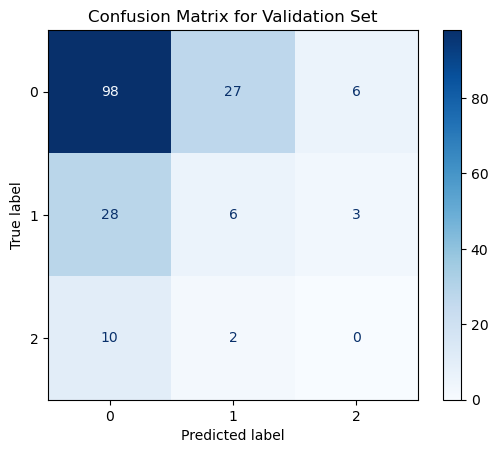

Validation Set Accuracy: 0.5777777777777777


['../models/decision_tree.joblib']

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Load the training dataset
train_file_path = '../data/training_dataset.csv'
data = pd.read_csv(train_file_path)

# Separate features and target
X = data[['roiX', 'roiY', 'roiZ']]
y = data['aclDiagnosis']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

# Calculate accuracy on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Generate confusion matrix for validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix for validation set
val_disp = ConfusionMatrixDisplay(confusion_matrix=val_conf_matrix, display_labels=clf.classes_)
val_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Validation Set")
plt.show()

print("Validation Set Accuracy:", val_accuracy)

# Save the trained model
model_file_path = '../models/decision_tree.joblib'
joblib.dump(clf, model_file_path)


# Use the model to predict on test dataset

In [9]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, accuracy_score
from tabulate import tabulate

# Load the trained model
model_path = '../models/decision_tree.joblib'
clf = joblib.load(model_path)

# Function to input file and make predictions
def test_model_from_file():
    # Get input file path
    input_file_path = input("Enter the path to the input file (CSV or Excel): ")
    
    # Determine the file type and load the data
    if input_file_path.endswith('.csv'):
        data = pd.read_csv(input_file_path)
    elif input_file_path.endswith('.xlsx') or input_file_path.endswith('.xls'):
        data = pd.read_excel(input_file_path)
    else:
        print("Unsupported file format. Please provide a CSV or Excel file.")
        return

    # Extract features based on position
    if data.shape[1] >= 3:
        # Extract the first three columns for features
        X_test = data.iloc[:, :3]
        X_test.columns = ['roiX', 'roiY', 'roiZ']  # Rename columns for consistency
    else:
        print("The input file does not have enough columns.")
        return
    
    # Make predictions
    y_test_pred = clf.predict(X_test)
    
    # If 'aclDiagnosis' column exists, evaluate performance
    if 'aclDiagnosis' in data.columns:
        y_test_true = data['aclDiagnosis']
        accuracy = accuracy_score(y_test_true, y_test_pred)
        report = classification_report(y_test_true, y_test_pred, target_names=clf.classes_)
        print(f"Accuracy on test set: {accuracy}")
        print("Classification Report:")
        print(report)
    else:
        print("The input file does not contain the true labels for evaluation.")
    
    # Add predictions to the DataFrame
    data['aclDiagnosis_pred'] = y_test_pred
    
    # Display the results in tabular format
    print("\nPredictions and Input Data:")
    print(tabulate(data, headers='keys', tablefmt='pretty', showindex=False))

    # Save the DataFrame with predictions
    output_file_path = '../results/predicted_results_decision_tree.csv'
    data.to_csv(output_file_path, index=False)
    print(f"Predictions saved to {output_file_path}")

# Test the model from file
test_model_from_file()

Enter the path to the input file (CSV or Excel): ../data/carla_dataset.xlsx
The input file does not contain the true labels for evaluation.

Predictions and Input Data:
+--------+--------+--------+-------------------+
| Axis X | Axis Z | Axis Y | aclDiagnosis_pred |
+--------+--------+--------+-------------------+
|  189   |   38   |  125   |         1         |
|  128   |   15   |  131   |         2         |
|  160   |   28   |  100   |         1         |
|  160   |   26   |   99   |         1         |
|  168   |   27   |  109   |         1         |
|  199   |   42   |  121   |         1         |
|  195   |   39   |  103   |         1         |
|  161   |   30   |  101   |         1         |
|  153   |   26   |  101   |         1         |
|  130   |   21   |  129   |         1         |
|  223   |   49   |  133   |         1         |
|  189   |   34   |  120   |         1         |
|  173   |   32   |   96   |         1         |
|  162   |   30   |   99   |         1         